<a href="https://colab.research.google.com/github/kimtaeyoon1/pdm05/blob/main/project/pdm_prj01_mid_MLP_A_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDM: Project01
- ### data: sklearn이 제공하는 당뇨병 데이터  
- ### analysis:  Keras MLP Regression 


# pandas
## MLP
    * 당뇨병 데이터 MLP 회기 분석 모형

> [참고] https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [ ]:
# import
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets

In [ ]:
#
# pandas
#
########################################
# 당뇨병 데이터 구조 => DataFrame
# Attribute Information:
#     - age     age in years
#     - sex
#     - bmi     body mass index
#     - bp      average blood pressure
#     - s1      tc, T-Cells (a type of white blood cells)
#     - s2      ldl, low-density lipoproteins
#     - s3      hdl, high-density lipoproteins
#     - s4      tch, thyroid stimulating hormone
#     - s5      ltg, lamotrigine
#     - s6      glu, blood sugar level
# - target  a quantitative measure of disease progression one year after baseline
# [참고] https://wikidocs.net/49981
#       https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes
#
########################################
df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## Check data

In [ ]:
# NaN, null
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [ ]:
# Duplicates
df.duplicated().sum()

0

## target의 값을 결정하는 중요한 특징
- 양의 상관성: bmi, bp, s5
- 반상관성 : s3

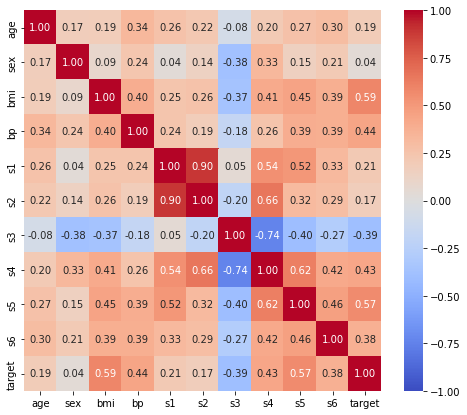

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()

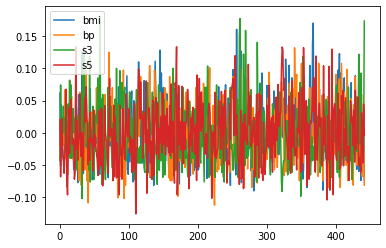

In [ ]:
df[['bmi','bp','s3','s5']].plot()

<Figure size 576x576 with 0 Axes>

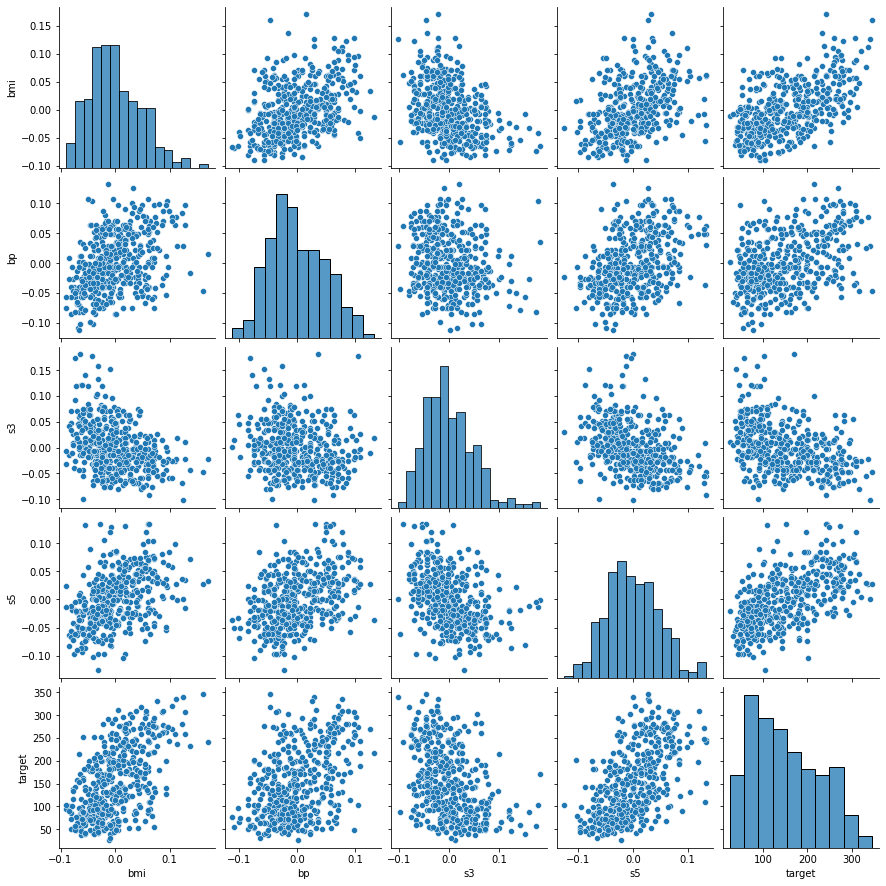

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi', 'bp', 's3','s5','target']])
plt.show()

---

## 데이터 구성
- train data
- test data


In [ ]:
X = df[['bmi', 'bp', 's3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)

((442, 4), (442, 1), numpy.ndarray, numpy.ndarray)

In [ ]:
# target: 2d array => vector
y = np.squeeze(y, 1)
X.shape, y.shape

((442, 4), (442,))

In [ ]:
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 4), (89, 4), (353,), (89,))

## MLP model
- Sequential model
- Functional model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

### Sequential model

In [ ]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (4,), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear') ) #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


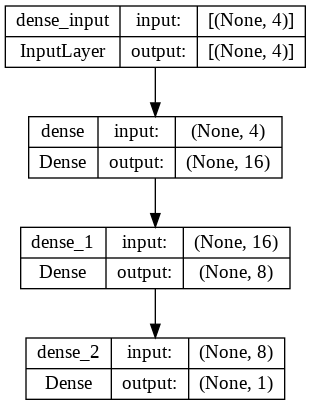

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 2s - loss: 31487.0664 - mse: 31487.0664 - val_loss: 22424.6250 - val_mse: 22424.6250 - 2s/epoch - 78ms/step
Epoch 2/200
29/29 - 0s - loss: 31415.1992 - mse: 31415.1992 - val_loss: 22361.5234 - val_mse: 22361.5234 - 259ms/epoch - 9ms/step
Epoch 3/200
29/29 - 0s - loss: 31328.8125 - mse: 31328.8125 - val_loss: 22281.3301 - val_mse: 22281.3301 - 154ms/epoch - 5ms/step
Epoch 4/200
29/29 - 0s - loss: 31222.0645 - mse: 31222.0645 - val_loss: 22184.1621 - val_mse: 22184.1621 - 125ms/epoch - 4ms/step
Epoch 5/200
29/29 - 0s - loss: 31094.4180 - mse: 31094.4180 - val_loss: 22067.9395 - val_mse: 22067.9395 - 173ms/epoch - 6ms/step
Epoch 6/200
29/29 - 0s - loss: 30942.8516 - mse: 30942.8516 - val_loss: 21934.3555 - val_mse: 21934.3555 - 103ms/epoch - 4ms/step
Epoch 7/200
29/29 - 0s - loss: 30772.1035 - mse: 30772.1035 - val_loss: 21783.6074 - val_mse: 21783.6074 - 91ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 30575.9863 - mse: 30575.9863 - val_loss: 21612.5234 - val_mse:

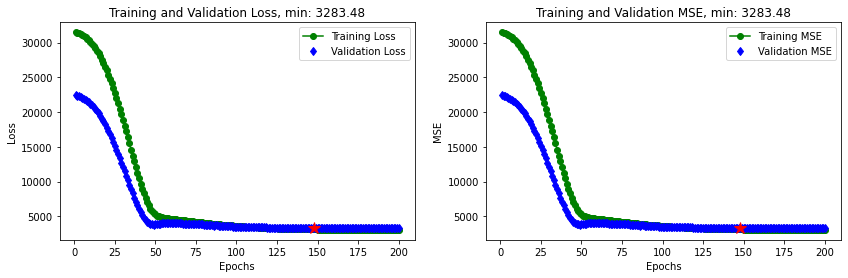

In [ ]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2944.8704 - mse: 2944.8701 - 19ms/epoch - 2ms/step
테스트 세트의 MSE: 2944.87 


In [ ]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 1ms/step


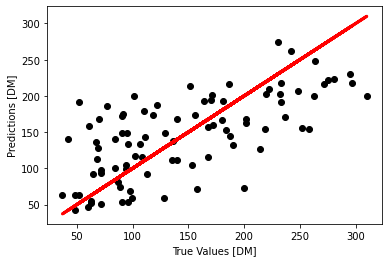

In [ ]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [ ]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2944.8701215128854
r2_score: 0.4441702953605656


---

### [DIY] MLP Functional model을 구성해서 분석하시오.

In [ ]:
# Functional model
from keras import layers, models

inputs = layers.Input(shape=(4,))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
output = Dense(1, activation='linear')(x)

model = models.Model(inputs=inputs, outputs=output)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31503.9707 - mse: 31503.9707 - val_loss: 22448.0391 - val_mse: 22448.0391 - 635ms/epoch - 22ms/step
Epoch 2/200
29/29 - 0s - loss: 31450.1445 - mse: 31450.1445 - val_loss: 22397.6602 - val_mse: 22397.6602 - 58ms/epoch - 2ms/step
Epoch 3/200
29/29 - 0s - loss: 31380.3828 - mse: 31380.3828 - val_loss: 22330.0098 - val_mse: 22330.0098 - 64ms/epoch - 2ms/step
Epoch 4/200
29/29 - 0s - loss: 31290.3477 - mse: 31290.3477 - val_loss: 22247.2812 - val_mse: 22247.2812 - 62ms/epoch - 2ms/step
Epoch 5/200
29/29 - 0s - loss: 31181.4648 - mse: 31181.4648 - val_loss: 22146.3066 - val_mse: 22146.3066 - 68ms/epoch - 2ms/step
Epoch 6/200
29/29 - 0s - loss: 31048.8613 - mse: 31048.8613 - val_loss: 22028.9062 - val_mse: 22028.9062 - 51ms/epoch - 2ms/step
Epoch 7/200
29/29 - 0s - loss: 30891.9043 - mse: 30891.9043 - val_loss: 21884.3301 - val_mse: 21884.3301 - 51ms/epoch - 2ms/step
Epoch 8/200
29/29 - 0s - loss: 30703.7617 - mse: 30703.7617 - val_loss: 21717.9121 - val_mse: 2

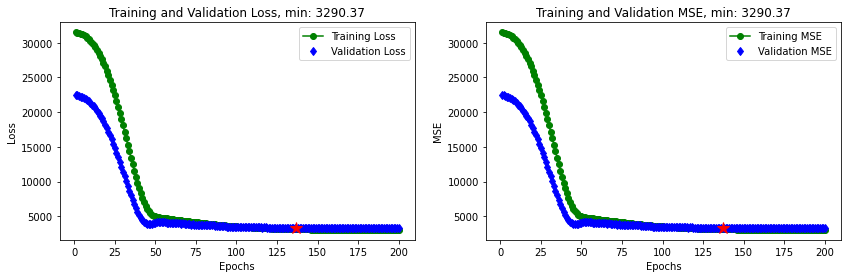

In [ ]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2961.0818 - mse: 2961.0818 - 21ms/epoch - 2ms/step
테스트 세트의 MSE: 2961.08 


In [ ]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 2ms/step


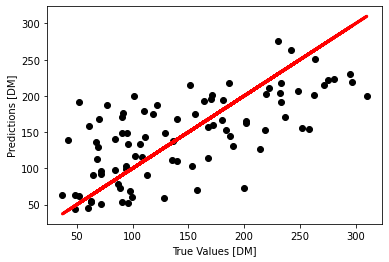

In [ ]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [ ]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2961.081731589057
r2_score: 0.4411104339512145


---
[DIY] 도전해서 아래에 완성하시오.
---
## target의 값을 결정하는 중요한 특징을 변경
- 양의 상관성: bmi, bp, s5
- 반상관성 : s3

1. 양의 상관성 특징에서 bp를 제외하고 모델을 훈련
2. 양의 상관성 특징에 s4를 추가해서 모델을 훈련
3. optimizer 또는 activation 을 변경해서 모델 훈련
4. 위의 결과를 비교하는 결과 정리

In [ ]:
1. 차이점 : epoch횟수에 차이가 난다. 4개를 가지고 할때는 150-175회 사이지만 3개를 가지고 할때는 125-150회 사이에서 loss값이 최적이 된다. 

2. 차이점 : 마찬가지로 epoch횟수에서 차이가 난다. 175-200회 사이에서 loss값이 최적이 된다.

3. 1,2히든 레이어를 모두 relu 함수에서 sigmoid함수로 바꾸게 되면 loss값이 6350이하로 떨어지지 않았다.

1히든 레이어를 sigmoid로 바꾸게 되면 학습에 350회 정도가 소요 되지만 loss값은 3010 정도로 둘다 relu함수를 사용 한것보다 20정도 loss값이 줄었다. 물론 소요시간은 길었다. 2히든 레이어를 바꾸었을때는 정확한 값이 나오지 않았고 r2스코어또한 -0.02로 잘못된 결과가 나왔다.
optimizer를 adam으로 바꿨을때는 결과에서 큰 차이를 보이지는 않았다.


